In [1]:
import sys

DIR = "/workspaces/ts-forecasting/"

sys.path.append("/workspaces/ts-forecasting")
sys.path.append("/app")

In [2]:
from src.psql import PostgresDB

db = PostgresDB()

In [3]:
df = db.table_to_df("stock_data")

print(f"Unique stocks: {df.ticker.unique()}")
df.head(5)

Unique stocks: ['AAPL' 'GOOGL' 'MSFT' 'AMZN' 'TSLA' 'NVDA']


,ticker,ts,open,high,low,close,vwap,transactions
0,AAPL,2024-07-01 08:00:00+00:00,211.89,211.89,211.04,211.09,211.4229,1316
1,AAPL,2024-07-01 09:00:00+00:00,211.09,211.39,210.50,210.99,210.8973,1732
2,AAPL,2024-07-01 10:00:00+00:00,211.19,211.51,211.15,211.15,211.2866,286
3,AAPL,2024-07-01 11:00:00+00:00,211.14,211.66,211.14,211.65,211.4742,1135
4,AAPL,2024-07-01 12:00:00+00:00,211.32,212.20,210.62,211.45,211.2834,4964


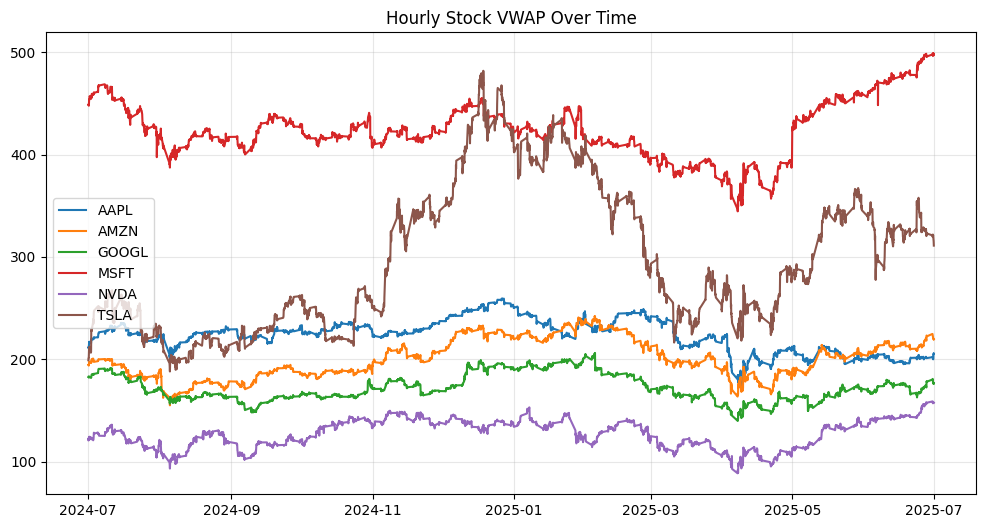

In [4]:
pv = df.pivot(index="ts", columns="ticker", values="vwap")
pv = pv.ffill()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title("Hourly Stock VWAP Over Time")

for c in pv.columns:
    plt.plot(pv.index, pv[c], label=c)

plt.grid(alpha=0.3)
plt.legend()
plt.show()